<a href="https://colab.research.google.com/github/Learnheart/URL-Classification/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
# from keras.layers.core import Dense, Activation
from keras.layers import Dense, Activation
# from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier


!pip3 install pyvi
from pyvi import ViUtils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
names=['URL','Category']
df=pd.read_csv('/content/drive/MyDrive/NCKH/full training data.csv',names=names, usecols=[0, 2], na_filter=False,  encoding='latin-1')
print(df.shape)
df[10632:10640]

(379119, 2)


,URL,Category
10632,bonbanh.com/ha-noi/oto/suzuki-grand_vitara-nam...,Automotive
10633,bonbanh.com/oto/mitsubishi-mirage-so-san-cu-da...,Automotive
10634,"mitsubishibacquang.bonbanh.com/chi-tiet-xe/id,...",Automotive
10635,kienthuc.net.vn/o-to-xe-may/nhung-quy-dinh-moi...,Automotive
10636,bonbanh.com/ha-noi/oto/mitsubishi-sf000000020/...,Automotive
10637,bonbanh.com/xe-porsche-cayenne--2008-3751103,Automotive
10638,otofun.net/threads/hoi-kinh-nghiem-dung-bong-d...,Automotive
10639,bonbanh.com/oto/toyota-corolla_altis-sedan-4-c...,Automotive


In [4]:
def url_to_text(url):
  # remove stopwords
  url = url.replace('.html','').replace('.htm','').replace('http://','').replace('https://','')
  url = re.sub('^(.*?/)','/', url) # remove domains
  url = re.sub('[0-9]+', '', url)
  url = re.sub('[_\-/]+', ' ', url)

  return ViUtils.remove_accents(url.lower()).decode()

df['URL'] = df['URL'].apply(url_to_text)
df
dataset = df[:]
train, test = train_test_split(dataset, random_state=33, test_size=0.1)
train, val = train_test_split(train, random_state=44, test_size=0.2)
train.tail()
val.tail()
test.tail()

,URL,Category
205946,giai ma con giap khong can than la de mac han...,Science & Technology
141599,am thuc ngon quen sau voi thit ngam vi huong ...,Food & Drink
151951,bun dau hang khay co tuyen,Food & Drink
45137,tai lieu hoan thien nghiep vu tu van xac dinh...,Business & Finance
355610,en g the walking merge,Games


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import pickle
import time

# Record the start time
start_time = time.time()

# Your existing code
X = df['URL'].apply(url_to_text)
y = df['Category']

# Split the data into train, validation, and test sets
train, test = train_test_split(df, random_state=33, test_size=0.1)
train, val = train_test_split(train, random_state=44, test_size=0.2)

# Assuming 'target_column' is the target column in your DataFrame
X_train, y_train = train['URL'].apply(url_to_text), train['Category']
X_val, y_val = val['URL'].apply(url_to_text), val['Category']
X_test, y_test = test['URL'].apply(url_to_text), test['Category']

# Create a pipeline
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vect', vectorizer),
    ('chi',  SelectKBest(chi2, k=1200)),
    ('clf', RandomForestClassifier())
])

# Fit the model
model = pipeline.fit(X_train, y_train)

# Save the model using pickle
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

# Record the end time
end_time = time.time()

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Training time: 988.4357047080994 seconds
                        precision    recall  f1-score   support

            Automotive       0.99      0.97      0.98      3108
    Books & Literature       0.89      0.97      0.93      1695
    Business & Finance       0.99      0.99      0.99      2887
               Careers       0.99      0.97      0.98      1415
             Education       0.99      0.99      0.99      1772
   Entertainment & Art       0.98      0.98      0.98      4593
           Environment       0.96      0.83      0.89      1013
Family & Relationships       0.95      0.94      0.95      1530
          Food & Drink       0.92      0.97      0.94      2943
                 Games       0.98      0.94      0.96       984
        Healthy Living       0.96      0.95      0.96      1407
         Home & Garden       0.98      0.99      0.98      1702
       Laws & Policies       0.99      0.90      0.94       995
       News & Politics       0.95      0.96      0.96      220

In [6]:

# Load the trained model
with open('RandomForest.pickle', 'rb') as f:
    model = pickle.load(f)

new_input_url = 'https://www.vinmec.com/vi/tin-tuc/thong-tin-suc-khoe/song-khoe/cuoc-song-ben-bo-bien-giup-ban-xoa-diu-tam-tri/'
new_input_processed = url_to_text(new_input_url)

# Make prediction for the new input
prediction = model.predict([new_input_processed])

# Print the prediction
print(f"Prediction for '{new_input_url}': {prediction}")


Prediction for 'https://www.vinmec.com/vi/tin-tuc/thong-tin-suc-khoe/song-khoe/cuoc-song-ben-bo-bien-giup-ban-xoa-diu-tam-tri/': ['Healthy Living']


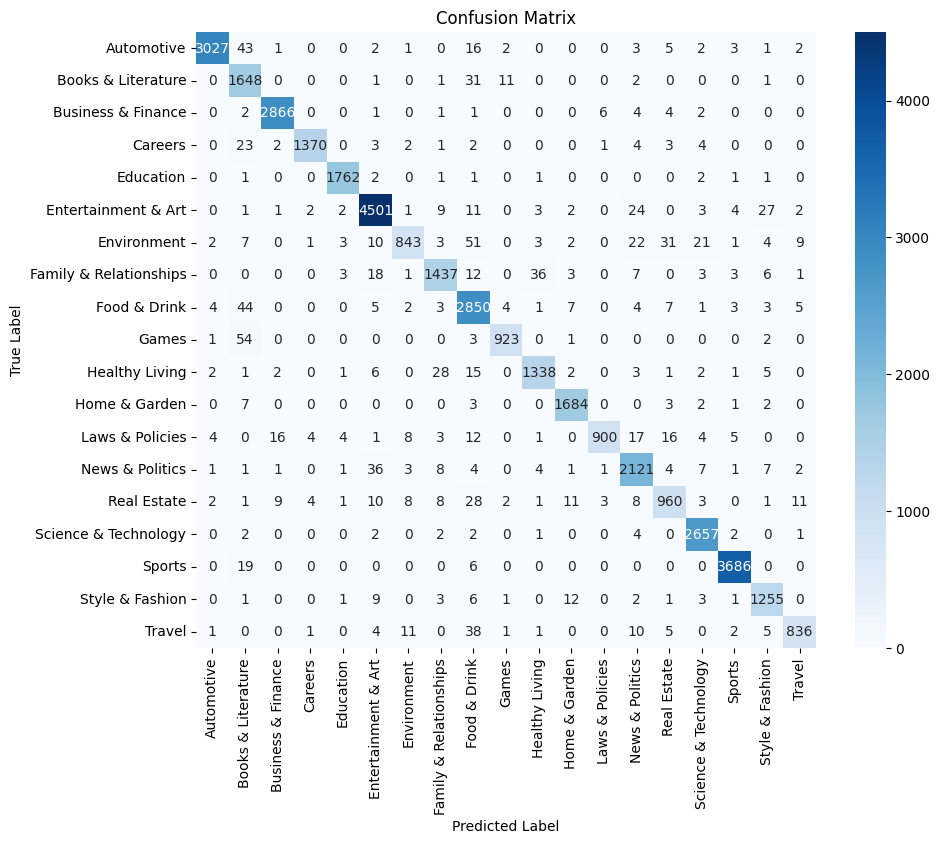

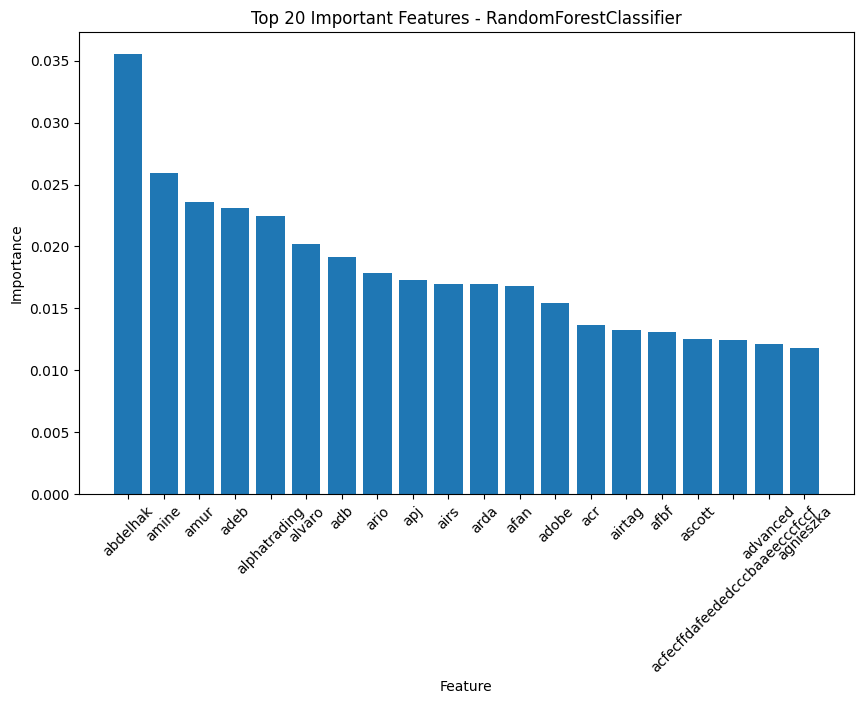

In [13]:
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance for RandomForestClassifier
if hasattr(model.named_steps['clf'], 'feature_importances_'):
    feature_importances = model.named_steps['clf'].feature_importances_
    feature_names = model.named_steps['vect'].get_feature_names_out()

    # Get top N important features
    top_n = 20
    indices = feature_importances.argsort()[-top_n:][::-1]

    # Plot top N features
    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n), feature_importances[indices], align="center")
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=45)
    plt.title("Top {} Important Features - RandomForestClassifier".format(top_n))
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

# Plot the ROC curve (if applicable, for binary classification)
if len(model.classes_) == 2:
    from sklearn.metrics import plot_roc_curve

    plt.figure(figsize=(8, 6))
    plot_roc_curve(model, X_test, y_test)
    plt.title("ROC Curve")
    plt.show()


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import pickle

# # instead of doing these steps one at a time, we can use a pipeline to complete then all at once
# vectorizer = TfidfVectorizer()
# pipeline = Pipeline([('vect', vectorizer),
#                      ('chi',  SelectKBest(chi2, k=1200)),
#                      ('clf', RandomForestClassifier())])

# # fitting our model and save it in a pickle for later use
# model = pipeline.fit(X_train, y_train)
# with open('RandomForest.pickle', 'wb') as f:
#     pickle.dump(model, f)

# ytest = np.array(y_test)

# # confusion matrix and classification report(precision, recall, F1-score)
# print(classification_report(ytest, model.predict(X_test)))
# print(confusion_matrix(ytest, model.predict(X_test)))